In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("movie.csv", sep = ",")
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df['genres'] = df['genres'].str.split('|')
df.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [5]:
# Define the emotion-genre mapping
# emotion_genre_mapping = {
#     'Angry': ['Family', 'Drama', 'Romance', 'Travel'],
#     'Disgust': ['Musical', 'Fantasy', 'History'],
#     'Fear': ['Musical', 'Fantasy', 'Action', 'Sports'],
#     'Happy': ['Action', 'Thriller', 'Sci-Fi'],
#     'Sad': ['Drama', 'Romance', 'Comedy'],
#     'Surprise': ['Thriller', 'Mystery', 'Adventure', 'Horror']
# }

# Define the emotion-genre mapping
emotion_genre_mapping = {
    'Frustration': ['Family', 'Drama', 'Romance', 'Travel','Musical', 'Fantasy', 'History'],
    'Happy': ['Action', 'Thriller', 'Sci-Fi'],
    'Sad': ['Drama', 'Romance', 'Comedy'],
    'Neutral': ['Thriller', 'Mystery', 'Adventure', 'Horror', 'Drama', 'Romance']
}

In [6]:
# Function to map emotions based on genres
def map_emotions(genres):
    emotions = []
    for emotion, genre_list in emotion_genre_mapping.items():
        if any(genre in genres for genre in genre_list):
            emotions.append(emotion)
    return emotions if emotions else ['Unknown']  # Assign 'Unknown' if no emotion is found

# Create a new column 'emotions' and map it based on genres
df['emotions'] = df['genres'].apply(map_emotions)

# Display the resulting DataFrame
df.head()

,movieId,title,genres,emotions
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]","[Frustration, Sad, Neutral]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]","[Frustration, Neutral]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]","[Frustration, Sad, Neutral]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]","[Frustration, Sad, Neutral]"
4,5,Father of the Bride Part II (1995),[Comedy],[Sad]


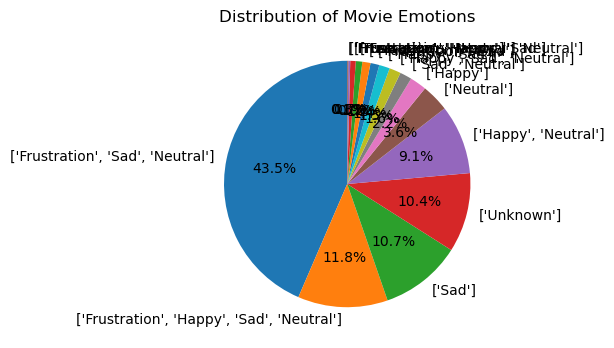

In [7]:
# Count the occurrences of each label
label_counts = df['emotions'].value_counts()

# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Movie Emotions')
plt.show()

In [8]:
df.head(20)

,movieId,title,genres,emotions
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]","[Frustration, Sad, Neutral]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]","[Frustration, Neutral]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]","[Frustration, Sad, Neutral]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]","[Frustration, Sad, Neutral]"
4,5,Father of the Bride Part II (1995),[Comedy],[Sad]
5,6,Heat (1995),"[Action, Crime, Thriller]","[Happy, Neutral]"
6,7,Sabrina (1995),"[Comedy, Romance]","[Frustration, Sad, Neutral]"
7,8,Tom and Huck (1995),"[Adventure, Children]",[Neutral]
8,9,Sudden Death (1995),[Action],[Happy]
9,10,GoldenEye (1995),"[Action, Adventure, Thriller]","[Happy, Neutral]"


In [9]:
none_emotion = df.loc[df['emotions'].isna()]
none_emotion.genres.value_counts()

Series([], Name: genres, dtype: int64)

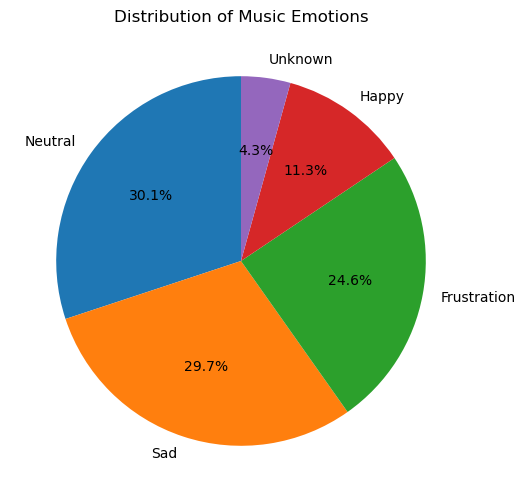

In [10]:
# Flatten the list of emotions
all_emotions = [emotion for emotions_list in df['emotions'] for emotion in emotions_list]

# Count the occurrences of each label
label_counts = pd.Series(all_emotions).value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Music Emotions')
plt.show()

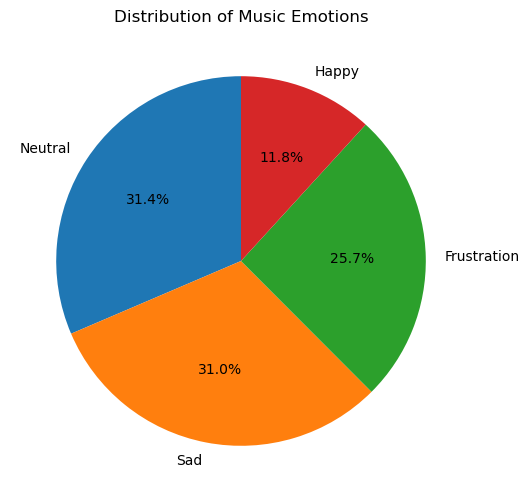

In [11]:
# Flatten the list of emotions and filter out 'Unknown' emotions
all_emotions = [emotion for emotions_list in df['emotions'] for emotion in emotions_list if emotion != 'Unknown']

# Count the occurrences of each label
label_counts = pd.Series(all_emotions).value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Music Emotions')
plt.show()